In [1]:
import pandas as pd
import csv
import re
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import multiprocessing


Фильтрация по имени класса

In [2]:
def filter_by_class_name(input_df: pd.DataFrame, name_class: str) -> pd.DataFrame:
    mask = (input_df.Class == name_class)
    new_df = (input_df[mask])
    return new_df

Сортировка dataframe по заданному значению высоты или ширины изоюражений

if sort parameter = width => w_or_h = True, else w_or_h = False

In [3]:
def filter_by_size(input_df: pd.DataFrame, value: int, w_or_h: bool) -> pd.DataFrame:
    if w_or_h:
        mask = (input_df.Image_width <= int(value))
    else:
        mask = (input_df.Image_hight <= int(value))
    new_df = (input_df[mask])
    return new_df

формирование гистограммы для определённого цвета

Входные данные в формате кортежа или списка: (данные_о_цвете, имя_цвета{r, g, b})

In [4]:
def show_hist(color_and_name_color: list) -> None:
    col = color_and_name_color[0]
    name_color = color_and_name_color[1]

    if name_color == "r":
        plt.hist(col, color="red")
        plt.title("Histogram of red color", color="red")
    if name_color == "g":
        plt.hist(col, color="green")
        plt.title("Histogram of green color", color="green")
    if name_color == "b":
        plt.hist(col, color="blue")
        plt.title("Histogram of blue color", color="blue")
    plt.xlabel("Intensity")
    plt.ylabel("Number of pixels")
    plt.show()

Создание и вывод гистограммы по случайно выбранной картинке

Вывод выбранной фотографии(закоментирован так как возникают некоторые проблемы с выводом в Jupiter)

In [5]:
def create_histogram(input_df: pd.DataFrame, name_class: str) -> None:
    result = [[], [], []]
    abs_way_list = filter_by_class_name(input_df, name_class)[
        "The_Absolute_way"].tolist()
    abs_way = str(abs_way_list[random.randint(0, len(abs_way_list) - 1)])
    image = cv2.imdecode(np.fromfile(
        abs_way, dtype=np.uint8), cv2.IMREAD_COLOR)
    #cv2.imshow("Original image", image)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        result[-i+1] = histr
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.show()
    return result

Считавание колонки под номером number_of_cell в файле с путём way_to_file

In [6]:
def read_csv(way_to_file: str, number_of_cell: int) -> list:
    read_list = []
    file = open(way_to_file, "r", encoding="utf-8")
    reader = csv.reader(file, delimiter="\t")
    for row in reader:
        if number_of_cell == 1:
            row_to_app = re.split(";", str(row))[number_of_cell]
        else:
            row_to_app = re.split(";", str(row))[number_of_cell][0:-2]
        read_list.append(row_to_app)
    return read_list

Основная функция создания всего dataframe, а также выполнение сортировки и вывода гистограмм

In [7]:
list_abs_way = read_csv("dataset.csv", 1)
list_name_class = read_csv("dataset.csv", 2)
list_bin = ["Num_point"]
list_image_width = ["Image_width"]
list_image_hight = ["Image_hight"]
list_image_depth = ["Number_of_chanel"]
list_image_pix = ["Number of pixels"]
for row in list_name_class:
    if row == "zebra":
        list_bin.append("0")
    if row == "bay_horse":
        list_bin.append("1")
for way in list_abs_way:
    try:
        image = cv2.imread(way)
        list_image_width.append(image.shape[1])
        list_image_hight.append(image.shape[0])
        list_image_depth.append(image.shape[2])
        list_image_pix.append(
            str(int(image.shape[0]) * int(image.shape[1])))
    except:
        pass
for i in range(1, len(list_abs_way)):
    try:
        list_abs_way[i] = os.path.abspath(list_abs_way[i])
    except:
        pass
list_abs_way[0] = "The_Absolute_way"
df = pd.DataFrame(
    {
        list_name_class[0]: pd.array(list_name_class[1:]),
        list_abs_way[0]: pd.array(list_abs_way[1:]),
        list_bin[0]: pd.array(list_bin[1:]),
        list_image_width[0]: pd.array(list_image_width[1:]),
        list_image_hight[0]: pd.array(list_image_hight[1:]),
        list_image_depth[0]: pd.array(list_image_depth[1:]),
        list_image_pix[0]: pd.array(list_image_pix[1:])
    }
)
print(df)

          Class                                   The_Absolute_way Num_point  \
0         zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
1     bay_horse  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         1   
2         zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
3     bay_horse  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         1   
4         zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
...         ...                                                ...       ...   
2095  bay_horse  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         1   
2096      zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2097  bay_horse  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         1   
2098      zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2099  bay_horse  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         1   

      Image_width  Image_hight  Number_

In [8]:
start = False
while not start:
    print("Input name class->", end='')
    input_nc = input()
    os.system('cls')
    if input_nc in list_name_class:
        start = True
        print(filter_by_class_name(df, input_nc))

Input name class->      Class                                   The_Absolute_way Num_point  \
0     zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2     zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
4     zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
6     zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
8     zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
...     ...                                                ...       ...   
2090  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2092  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2094  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2096  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2098  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   

      Image_width  Image_hight  Number_of_chanel Number of pixels  
0

In [9]:
print("Input width->", end='')
input_w = input()
print("Input hight->", end='')
input_h = input()
os.system('cls')
first_sort_df = filter_by_size(filter_by_class_name(
    df, input_nc), input_w, True)
print(filter_by_size(first_sort_df, input_h, False))

Input width->Input hight->      Class                                   The_Absolute_way Num_point  \
14    zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
26    zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
28    zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
34    zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
40    zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
...     ...                                                ...       ...   
2076  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2078  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2084  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2090  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   
2092  zebra  f:\BRUH_Files\учёба\проектики\пп лаба 2\Bus_St...         0   

      Image_width  Image_hight  Number_of_chanel Number of pi

count         176.0
mean     294.755682
std        64.33717
min           160.0
25%           236.5
50%           320.0
75%           332.5
max           400.0
Name: Image_width, dtype: Float64
count    176.0
mean     320.0
std        0.0
min      320.0
25%      320.0
50%      320.0
75%      320.0
max      320.0
Name: Image_hight, dtype: Float64
count    176.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: Number_of_chanel, dtype: Float64


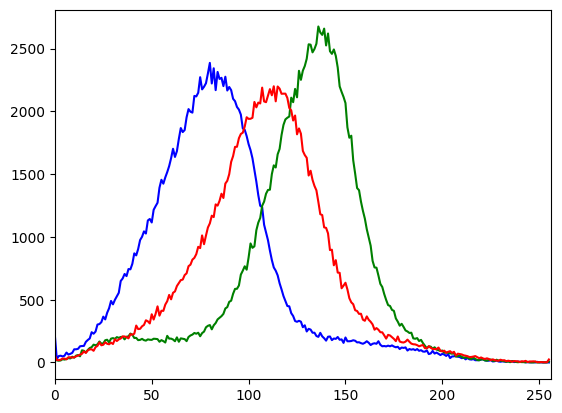

In [10]:
print(first_sort_df["Image_width"].describe())
print(first_sort_df["Image_hight"].describe())
print(first_sort_df["Number_of_chanel"].describe())
list_of_color = create_histogram(df, input_nc)

!MULTIPROCESSING НЕ РАБОТАЕТ В ДАННОМ ФОРМАТЕ, ОДНАКО ЕСЛИ ЗАПУСТИТЬ В ПИТОН ФАЙЛЕ, ТО СДЕЛАЕТ ВСЁ БЫСТРО И КРАСИВО!

In [ ]:
list_arg = [
    (list_of_color[0], 'r'),
    (list_of_color[1], 'g'),
    (list_of_color[2], 'b')
]

with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
    p.map(show_hist, list_arg)